Reading The Data****
-------------------------


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adult-subjects-70-95-years-activity-recognition/503.csv
/kaggle/input/adult-subjects-70-95-years-activity-recognition/506.csv
/kaggle/input/adult-subjects-70-95-years-activity-recognition/507.csv
/kaggle/input/adult-subjects-70-95-years-activity-recognition/505.csv
/kaggle/input/adult-subjects-70-95-years-activity-recognition/515.csv
/kaggle/input/adult-subjects-70-95-years-activity-recognition/513.csv
/kaggle/input/adult-subjects-70-95-years-activity-recognition/512.csv
/kaggle/input/adult-subjects-70-95-years-activity-recognition/509.csv
/kaggle/input/adult-subjects-70-95-years-activity-recognition/502.csv
/kaggle/input/adult-subjects-70-95-years-activity-recognition/508.csv
/kaggle/input/adult-subjects-70-95-years-activity-recognition/501.csv
/kaggle/input/adult-subjects-70-95-years-activity-recognition/511.csv
/kaggle/input/adult-subjects-70-95-years-activity-recognition/514.csv
/kaggle/input/adult-subjects-70-95-years-activity-recognition/504.csv
/kaggle/input/adult-

In [2]:
# Display files and folders in /kaggle/input
!ls /kaggle/input

adult-subjects-70-95-years-activity-recognition


In [3]:
# View folder contents to check file names
!ls /kaggle/input/adult-subjects-70-95-years-activity-recognition

501.csv  503.csv  505.csv  507.csv  509.csv  511.csv  513.csv  515.csv
502.csv  504.csv  506.csv  508.csv  510.csv  512.csv  514.csv


In [4]:
# import needed libraries
import pandas as pd
import glob

# Specify the path of files within the folder
file_paths = glob.glob('/kaggle/input/adult-subjects-70-95-years-activity-recognition/*.csv')

# Read each file and compile them into one DataFrame
all_data = pd.concat((pd.read_csv(file) for file in file_paths), ignore_index=True)

# Display Data
all_data


,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,2021-03-29 14:42:07.460,-0.971680,-0.072266,-0.175781,-1.712158,-0.120117,1.502686,6
1,2021-03-29 14:42:07.480,-1.364746,0.182861,-0.377197,-1.580322,-0.170166,-0.145508,6
2,2021-03-29 14:42:07.500,-1.249512,0.182129,-0.466553,-1.052734,-0.261719,-0.783691,6
3,2021-03-29 14:42:07.520,-0.841553,-0.026855,-0.445557,-0.863281,-0.132568,-0.416992,6
4,2021-03-29 14:42:07.539,-0.669189,-0.068115,-0.380371,-0.720215,-0.083496,-0.291504,6
...,...,...,...,...,...,...,...,...
1832555,2021-05-07 08:58:45.009,-0.974121,0.107666,-0.255615,-1.002930,0.034424,0.113525,6
1832556,2021-05-07 08:58:45.029,-0.958008,0.093018,-0.255615,-0.998779,0.019043,0.124756,6
1832557,2021-05-07 08:58:45.049,-0.957764,0.076660,-0.257568,-0.967529,0.021484,0.092529,6
1832558,2021-05-07 08:58:45.069,-0.946045,0.073730,-0.243164,-0.971680,0.018066,0.095947,6


Data Preprocessing****
----------------------------

In [5]:
# Ensure there are no missing values
all_data = all_data.dropna()

# Convert values to decimals, if there are columns that need to be modified
# Check data types to be sure
all_data = all_data.astype({
    'back_x': 'float64',
    'back_y': 'float64',
    'back_z': 'float64',
    'thigh_x': 'float64',
    'thigh_y': 'float64',
    'thigh_z': 'float64',
    'label': 'int'
})

In [6]:
all_data.head()

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,2021-03-29 14:42:07.460,-0.971680,-0.072266,-0.175781,-1.712158,-0.120117,1.502686,6
1,2021-03-29 14:42:07.480,-1.364746,0.182861,-0.377197,-1.580322,-0.170166,-0.145508,6
2,2021-03-29 14:42:07.500,-1.249512,0.182129,-0.466553,-1.052734,-0.261719,-0.783691,6
3,2021-03-29 14:42:07.520,-0.841553,-0.026855,-0.445557,-0.863281,-0.132568,-0.416992,6
4,2021-03-29 14:42:07.539,-0.669189,-0.068115,-0.380371,-0.720215,-0.083496,-0.291504,6


In [7]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1832560 entries, 0 to 1832559
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   timestamp  object 
 1   back_x     float64
 2   back_y     float64
 3   back_z     float64
 4   thigh_x    float64
 5   thigh_y    float64
 6   thigh_z    float64
 7   label      int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 111.9+ MB


In [8]:
all_data.isnull().sum()

timestamp    0
back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
dtype: int64

In [9]:
all_data.describe()

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
count,1.832560e+06,1.832560e+06,1.832560e+06,1.832560e+06,1.832560e+06,1.832560e+06,1.832560e+06
mean,-8.683814e-01,-3.178814e-02,2.244210e-02,-6.763959e-01,8.185066e-03,-3.858819e-01,3.940692e+00
std,2.756643e-01,1.556768e-01,4.279549e-01,5.596829e-01,2.707317e-01,5.087015e-01,2.912512e+00
min,-4.333252e+00,-2.031006e+00,-2.204834e+00,-7.942139e+00,-5.142578e+00,-7.593750e+00,1.000000e+00
25%,-9.909670e-01,-1.093750e-01,-2.692870e-01,-9.855960e-01,-1.132810e-01,-9.770510e-01,1.000000e+00
50%,-9.377440e-01,-1.855500e-02,-9.399400e-02,-9.357910e-01,-1.464800e-02,-1.906740e-01,3.000000e+00
75%,-8.344730e-01,5.761700e-02,3.078610e-01,-7.763700e-02,1.230470e-01,-3.174000e-03,7.000000e+00
max,3.630370e-01,1.576660e+00,1.179199e+00,3.395264e+00,5.725098e+00,3.953369e+00,8.000000e+00


In [10]:
all_data.columns

Index(['timestamp', 'back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y',
       'thigh_z', 'label'],
      dtype='object')

In [11]:
all_data = all_data.drop('timestamp', axis = 1)

In [12]:
all_data.columns

Index(['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z', 'label'], dtype='object')

In [13]:
print("Duplicate values in data ----> ",all_data.duplicated().sum())
all_data = all_data.drop_duplicates()

Duplicate values in data ---->  46610


In [14]:
all_data.shape

(1785950, 7)

In [15]:
all_data['label'].unique()

array([6, 3, 7, 1, 8, 5, 4])

EDA
------

Distribution of each label as percentage:
 label
1    48.696212
7    20.078278
6    19.132507
8     8.781657
3     2.849520
5     0.253199
4     0.208628
Name: proportion, dtype: float64


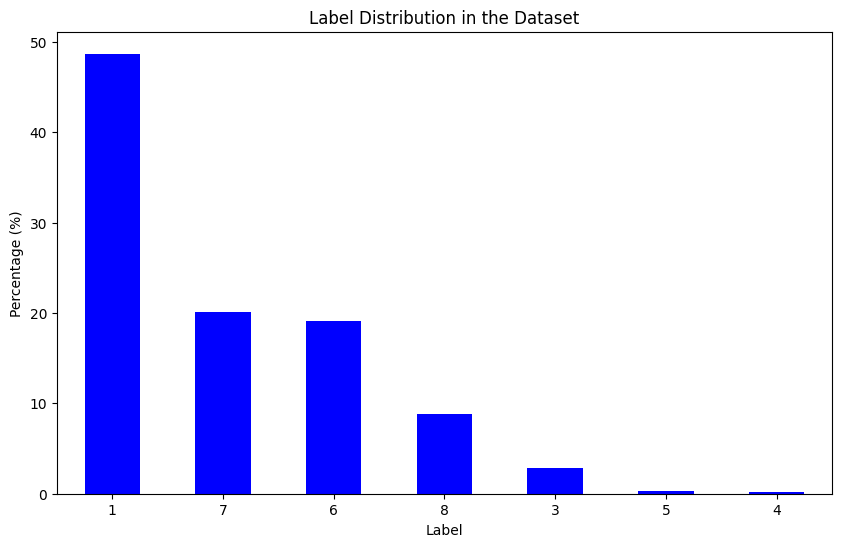

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the distribution for each category
label_counts = all_data['label'].value_counts(normalize=True) * 100

# Print the percentage for each category
print("Distribution of each label as percentage:\n", label_counts)

# A graph showing the distribution
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color='blue')
plt.title("Label Distribution in the Dataset")
plt.xlabel("Label")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.show()

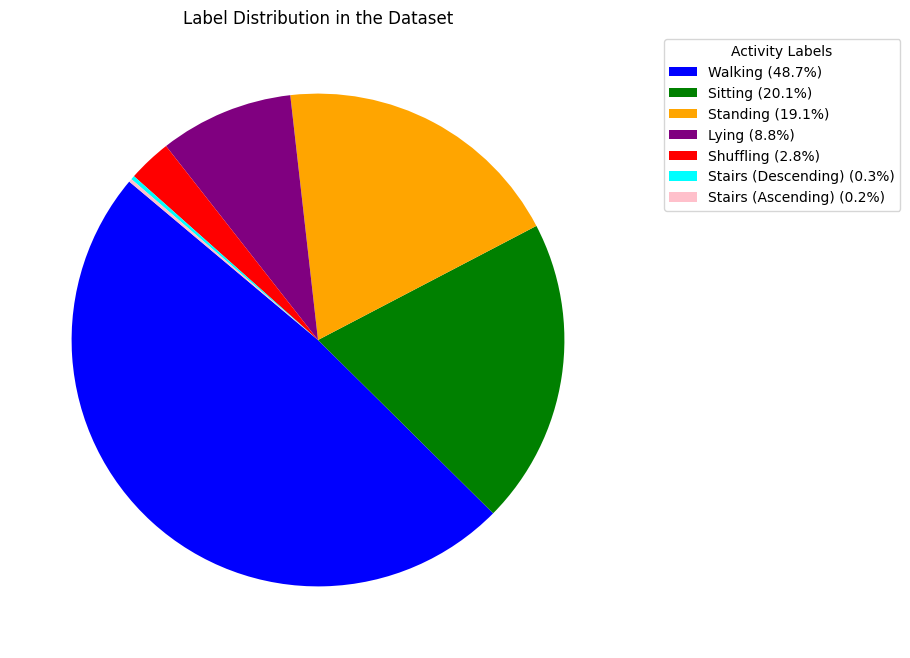

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the distribution for each category
label_counts = all_data['label'].value_counts(normalize=True) * 100

# Category names based on the numbers mentioned
label_names = {
    1: 'Walking',
    3: 'Shuffling',
    4: 'Stairs (Ascending)',
    5: 'Stairs (Descending)',
    6: 'Standing',
    7: 'Sitting',
    8: 'Lying'
}

colors = ['blue', 'green', 'orange', 'purple', 'red', 'cyan', 'pink']

# Replace numeric values ​​with class names
label_counts.index = label_counts.index.map(label_names)

# Draw a pie chart without text inside the drawing
plt.figure(figsize=(8, 8))  
plt.pie(label_counts, labels=[""] * len(label_counts), startangle=140, colors=colors[:len(label_counts)])

# Add a title
plt.title("Label Distribution in the Dataset")

# Add ligand with ratios
plt.legend([f"{label} ({count:.1f}%)" for label, count in zip(label_counts.index, label_counts)], 
           title="Activity Labels", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Split Data
---------


In [18]:
X = all_data.drop(['label'], axis=1)
y = pd.DataFrame(all_data['label'])

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1428760, 6), (1428760, 1), (357190, 6), (357190, 1))

Balance the labels using SMOTE
--------------------------------

In [20]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x_train, y_train)
X_resampled.shape, y_resampled.shape

((4873085, 6), (4873085, 1))

In [ ]:
# Assuming your SMOTE-processed features are in X_resampled and x_test
# Assuming your labels (target variable) are in y_resampled and y_test

# Concatenate features and labels
combined_data = np.concatenate((X_resampled, x_test), axis=0)
combined_labels = np.concatenate((y_resampled, y_test), axis=0)

# Create a DataFrame with the combined data and labels
data_smote = pd.DataFrame(combined_data, columns=['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z'])
data_smote['label'] = combined_labels

print(data_smote)

           back_x    back_y    back_z   thigh_x   thigh_y   thigh_z  label
0       -0.723145  0.087402 -0.433594 -1.124756 -0.205322 -0.210205      1
1       -0.968018  0.048096 -0.216553 -0.994629  0.003174  0.097656      6
2       -0.870361  0.056396 -0.190430 -1.044434 -0.156006 -0.107666      1
3       -0.998291 -0.307617 -0.604248 -0.994141  0.095703  0.161377      1
4       -1.069336  0.294922 -0.124023 -1.048096  0.374023 -0.277100      1
...           ...       ...       ...       ...       ...       ...    ...
5227449 -0.950439 -0.178955 -0.591064 -0.918457  0.157471 -0.163330      1
5227450 -1.036621 -0.232666 -0.580322 -1.538086 -0.211426  0.184570      1
5227451 -0.920898  0.055420 -0.055664 -0.942627  0.401367 -0.112549      1
5227452 -0.841553  0.029541 -0.258789 -1.010742 -0.212891 -0.078857      1
5227453 -1.038086  0.067871 -0.248291 -1.123047 -0.123291  0.040283      1

[5227454 rows x 7 columns]


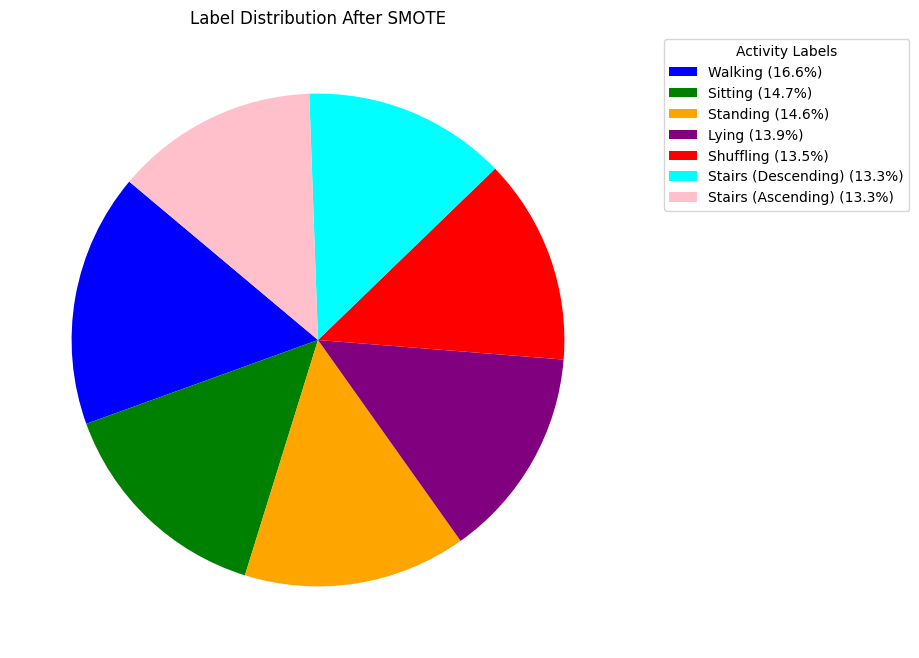

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Check for the actual column name (replace with your actual target column name if needed)
label_column = 'label'  # Assuming 'label' is the correct column name

# Calculate the distribution for each category after SMOTE
label_counts = data_smote[label_column].value_counts(normalize=True) * 100

# Category names based on the numbers mentioned
label_names = {
    1: 'Walking',
    3: 'Shuffling',
    4: 'Stairs (Ascending)',
    5: 'Stairs (Descending)',
    6: 'Standing',
    7: 'Sitting',
    8: 'Lying'
}

# Replace numeric values with translated class names
label_counts.index = label_counts.index.map(label_names)

# Draw a pie chart without text inside the drawing
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=[""] * len(label_counts), startangle=140, colors=['blue', 'green', 'orange', 'purple', 'red', 'cyan', 'pink'])

# Set the title and legend labels in Arabic using Unicode characters
plt.title("Label Distribution After SMOTE")
plt.legend([f"{label} ({count:.1f}%)" for label, count in zip(label_counts.index, label_counts)],
           title="Activity Labels", bbox_to_anchor=(1.05, 1), loc='upper left')

# Ensure proper font display for Arabic characters
from matplotlib import rcParams
rcParams['font.family'] = 'Arial'

plt.show()

Train RF model
-----------------------

In [21]:
from sklearn.ensemble import RandomForestClassifier 

classifier = RandomForestClassifier(n_estimators = 100, random_state = 0)
classifier.fit(X_resampled, y_resampled)

/tmp/ipykernel_30/3379240251.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_resampled, y_resampled)


RandomForestClassifier(random_state=0)

In [22]:
y_pred = classifier.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 6])

In [23]:
y_test

,label
222724,1
1310602,1
1300191,1
999163,7
520143,8
...,...
1699127,6
698131,1
1211005,1
1544181,1


Accuracy and Classification_report for RF Model
-----------------------------

In [24]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9201657381225679

In [25]:
import sklearn.metrics as mc

conf = mc.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf)

Confusion Matrix:
 [[158111   9249    706    874   4532     63      0]
 [  3216   5085     65     82   1711      0      0]
 [   319     45    386     32     14      0      0]
 [   509     63     16    312     25      0      0]
 [  3102   3684     43     69  62075      0      0]
 [    50      0      4      1      0  71408     23]
 [     0      0      0      0      0     19  31297]]


In [26]:
report = mc.classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           1       0.96      0.91      0.93    173535
           3       0.28      0.50      0.36     10159
           4       0.32      0.48      0.38       796
           5       0.23      0.34      0.27       925
           6       0.91      0.90      0.90     68973
           7       1.00      1.00      1.00     71486
           8       1.00      1.00      1.00     31316

    accuracy                           0.92    357190
   macro avg       0.67      0.73      0.69    357190
weighted avg       0.94      0.92      0.93    357190



In [29]:
import pickle
with open('RF_model.pkl', 'wb') as file:
    pickle.dump(classifier, file)
with open('RF_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)